# Milestone 1

# Introduction

Nama : Galih Sukmanaputra  

Batch : FTDS-005-HCK  

Dataset : Berasal dari bigquery-public-data ,dataset ml_datasets dari database bernama 
credit_card_default. Kemudian di query dan di save menjadi h8dsft_P1M1_galih_s.csv.  
  
Objective : Project kali ini bertujuan untuk membuat model classification untuk memprediksi default_payment_next_month menggunakan dataset yang telah disimpan.

### Query  

In [176]:
# SELECT limit_balance, 
#         cast(sex as int) as sex, 
#         cast(education_level as int) as education_level, 
#         cast(marital_status as int) as marital_status, 
#         age, 
#         pay_0, 
#         pay_2, 
#         pay_3, 
#         pay_4, 
#         cast(pay_5 as float64) as pay_5, 
#         cast(pay_6 as float64) as pay_6, 
#         bill_amt_1, 
#         bill_amt_2, 
#         bill_amt_3, 
#         bill_amt_4, 
#         bill_amt_5, 
#         bill_amt_6, 
#         pay_amt_1, 
#         pay_amt_2, 
#         pay_amt_3, 
#         pay_amt_4, 
#         pay_amt_5, 
#         pay_amt_6, 
#         cast(default_payment_next_month as int) as default_payment_next_month
# FROM `bigquery-public-data.ml_datasets.credit_card_default` 
# LIMIT 10000;

Data diambil berdasarkan perintah sola dan dibatasi sebanyak 10000, berasal dari tahun lahir dikalikan dengan nomor batch yaitu 2000 x 5 = 10000

# Import Libraries

Dalam tahapan ini dilakukan import seluruh library yang dibutuhkan

In [177]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')


# Data Loading

Dalam tahapan ini data akan dicek dan dipahami polanya untuk pengolahan selanjutnya.

In [178]:
# Load Dataset

data = pd.read_csv("h8dsft_P1M1_galih_s.csv")
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


In [179]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [180]:
data[data.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Melakukan pengecekan terhadap data yang duplikat. Diperoleh hasil terjadi duplikasi data, sehingga data yang terduplikat harus dihapus.

In [181]:
data = data.drop_duplicates()

In [182]:
# Duplikasi dataset
data_duplicate = data.copy()

Dilakukan duplikasi data untuk berjaga-jaga jika sewaktu-waktu dibutuhkan dataset asli.

Melihat jumlah missing value pada tiap kolom

In [183]:
# Check Dataset-1
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2964 non-null   float64
 1   sex                         2964 non-null   int64  
 2   education_level             2964 non-null   int64  
 3   marital_status              2964 non-null   int64  
 4   age                         2964 non-null   float64
 5   pay_0                       2964 non-null   float64
 6   pay_2                       2964 non-null   float64
 7   pay_3                       2964 non-null   float64
 8   pay_4                       2964 non-null   float64
 9   pay_5                       2964 non-null   float64
 10  pay_6                       2964 non-null   float64
 11  bill_amt_1                  2964 non-null   float64
 12  bill_amt_2                  2964 non-null   float64
 13  bill_amt_3                  2964 

Tidak terdapat missing value pada dataset

In [184]:
num_col = data.describe().columns.tolist()
cat_col = data.select_dtypes(include=['object']).columns.tolist()

In [185]:
# numeric overview
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


Menampilkan deskripsi data numerikal

In [186]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

In [187]:
# categorical overview
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', data[i].nunique())
    print('-' * 30)

# Exploratory Data Analysis (EDA)

Dalam tahapan ini dilakukan eksplorasi data untuk mengetahui sebaran data dan visual data kedepannya agar perlakuan yang diterapkan sesuai. Selain itu, juga dilihat keterkaitan antar feature yang ada dengan label yang ingin diprediksi.

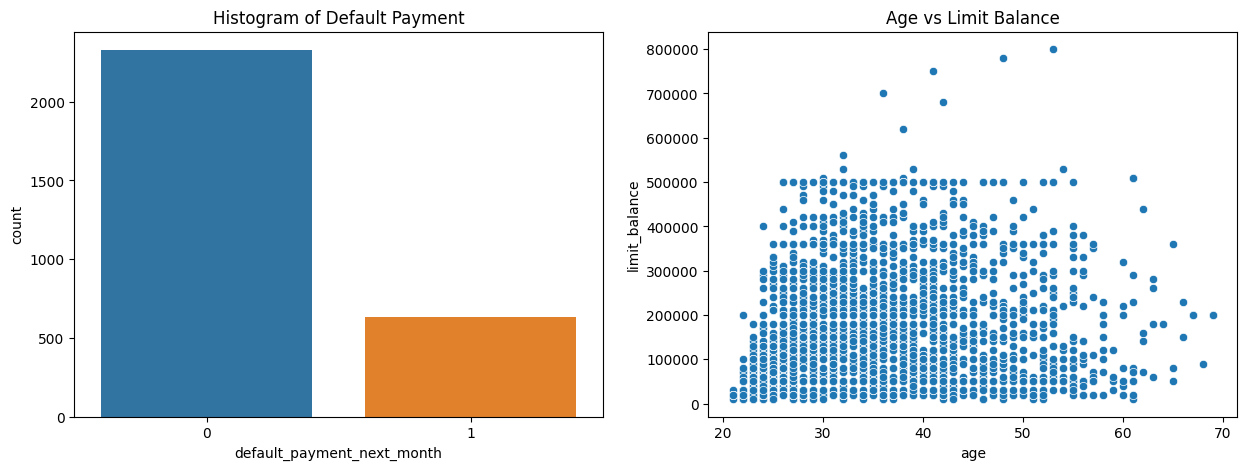

In [188]:
# Create Histogram and Scatter Plot

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data,x='default_payment_next_month')
plt.title('Histogram of Default Payment')

plt.subplot(1, 2, 2)
sns.scatterplot(x='age',y='limit_balance', data=data)
plt.title('Age vs Limit Balance')
plt.show()

Berdasarkan hasil visualisasi sederhana diketahui bahwa sebaran data y target tidak seimbang dan mayoritas bertumpuk pada kategori 0. Artinya sebaran tergolong tidak normal. Kemudian untuk proporsi antara umur dan jam kerja per minggu saling berdekatan satu sama lain dan semakin terlihat terdapat outlier.

In [189]:
data['default_payment_next_month'].value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

Diperoleh hasil sebaran pada y target menunjukkan lebih banyak yang tidak melakukan pembayaran dibandinngkan dengan yang membayar.

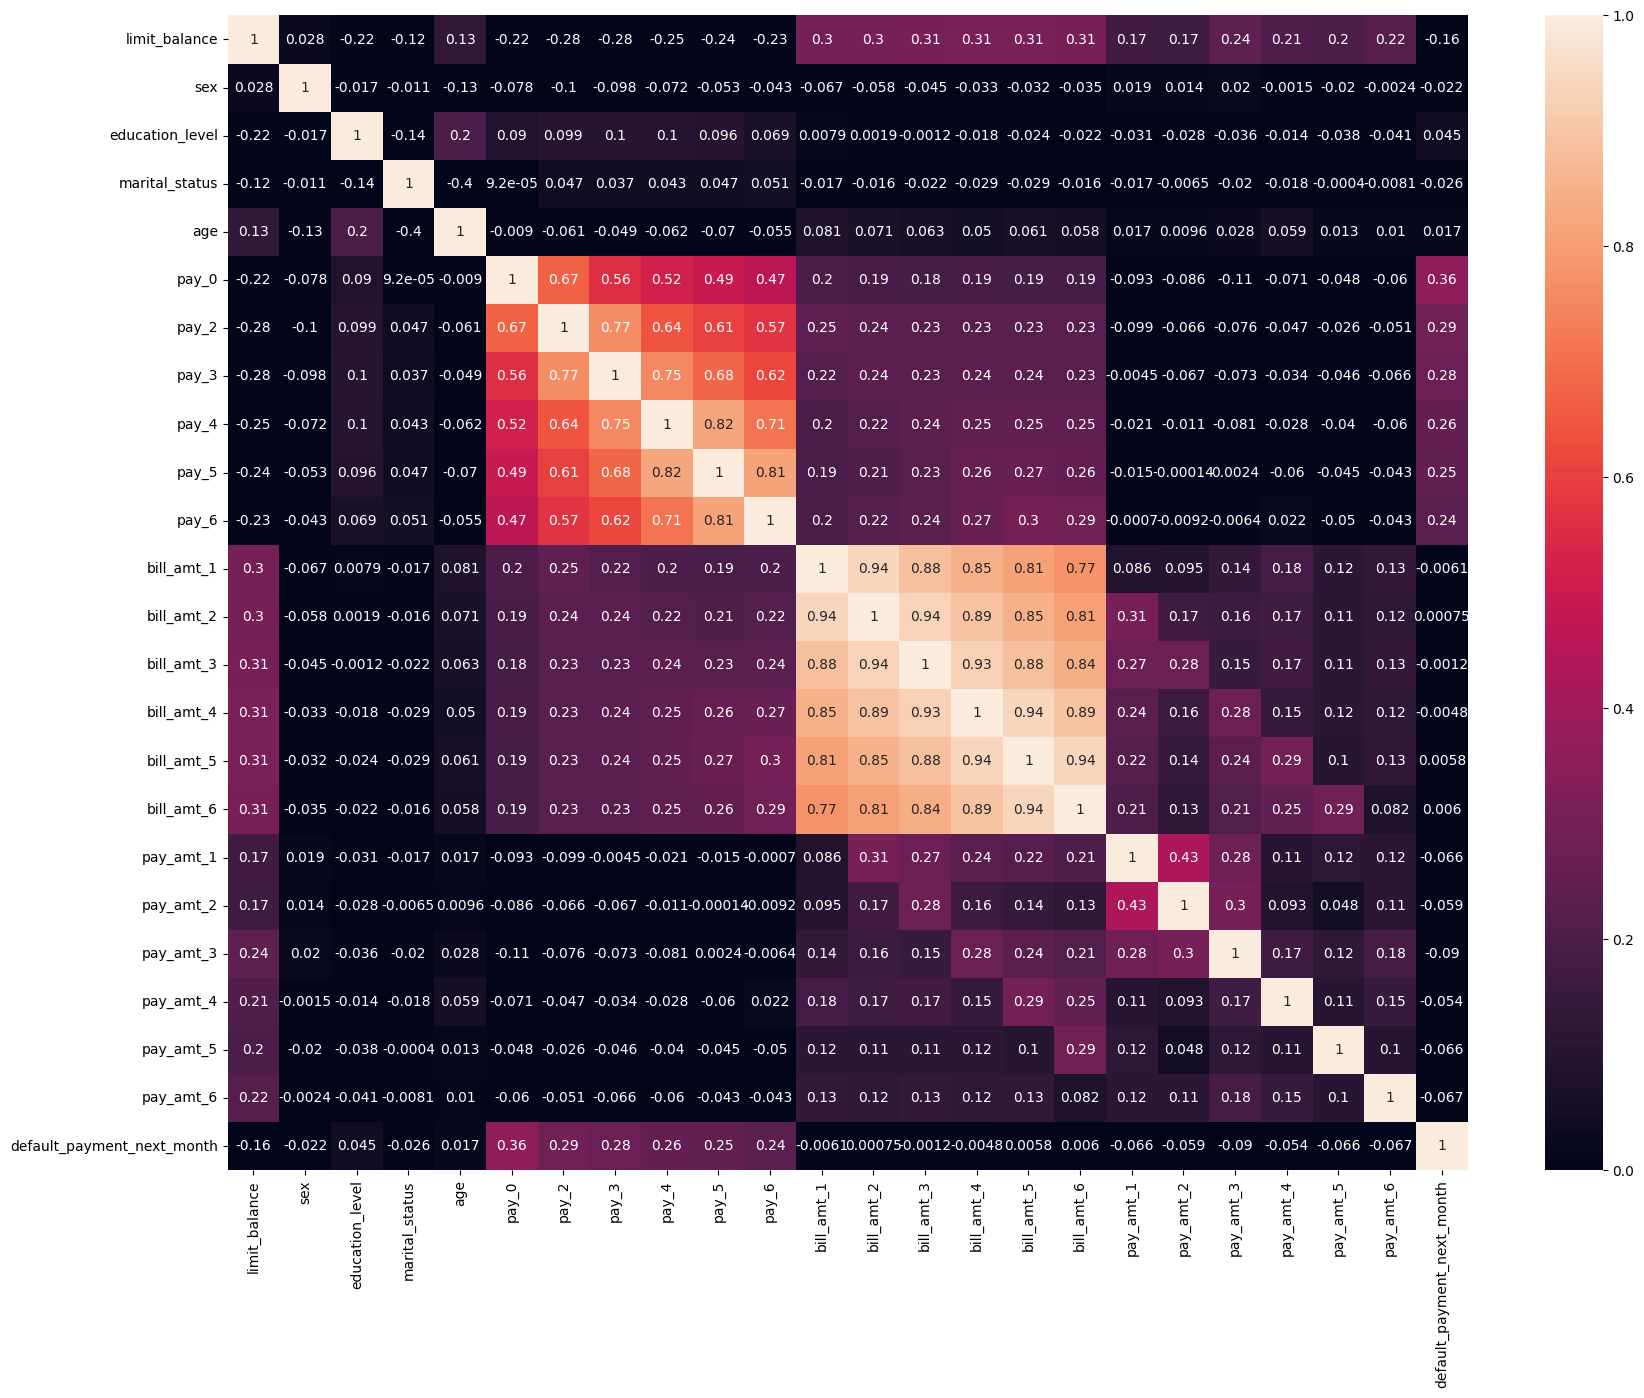

In [190]:
corr = data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Berikut ini dilihat korelasi antar tiap kolom dalam dataset. 

In [191]:
data_1 = data[['limit_balance','sex','education_level','marital_status','age','default_payment_next_month']]
data_1

,limit_balance,sex,education_level,marital_status,age,default_payment_next_month
0,80000.0,1,6,1,54.0,1
1,200000.0,1,4,1,49.0,0
2,20000.0,2,6,2,22.0,1
3,260000.0,2,4,2,33.0,0
4,150000.0,1,4,2,32.0,0
...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,0
2961,50000.0,2,3,1,51.0,1
2962,450000.0,2,2,1,38.0,1
2963,50000.0,2,2,1,44.0,0


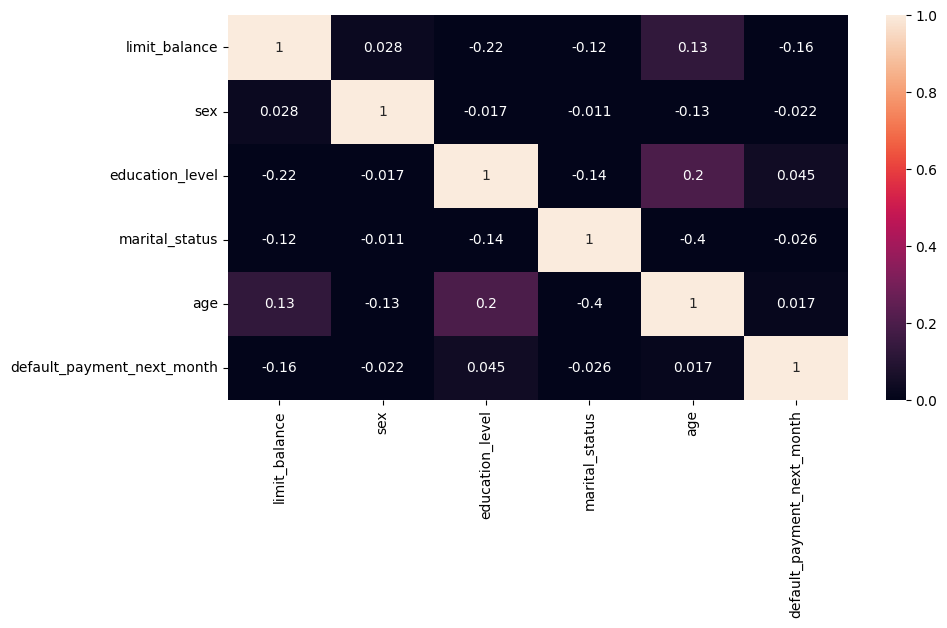

In [192]:
corr_2 = data_1.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_2, annot= True, vmin=0, vmax=1)
plt.show()

## VIF  
### Multicollinearity test

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [194]:
calc_vif(data[num_col])

,variables,VIF
0,limit_balance,4.129159
1,sex,9.135119
2,education_level,6.960218
3,marital_status,6.519135
4,age,11.291480
5,pay_0,1.992557
6,pay_2,3.259709
7,pay_3,3.531188
8,pay_4,4.188417
9,pay_5,4.997116


### Handling Outlier

In [195]:
# outlier detection using IQR 
Q3 = data['limit_balance'].quantile(.75)
Q1 = data['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier_lb = data[(data['limit_balance'] > upper) | (data['limit_balance'] < lower)]

print('count of outlier: ', outlier_lb.shape[0])
print('percentage of outlier: ', outlier_lb.shape[0]/data.shape[0] * 100, '%')

count of outlier:  14
percentage of outlier:  0.47233468286099867 %


Terdapat 14 outlier pada kolom capital_gain, berdasarkan kondisi ini maka outlier harus dihilangkan.

In [196]:
#Outlier checking on age
outlier_age = data[(data['age'] > upper) | (data['age'] < lower)]
print('count of outlier: ', outlier_age.shape[0])
print('percentage of outlier: ', outlier_age.shape[0]/data.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


Tidak terdapat outlier pada kolom age.

In [197]:
from feature_engine.outliers import Winsorizer
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['limit_balance'])
data_cleaned = wins.fit_transform(data)
print('before handling: \n', data[num_col].describe())
print('after handling: \n', data_cleaned[num_col].describe())


before handling: 
        limit_balance          sex  education_level  marital_status  \
count    2964.000000  2964.000000      2964.000000     2964.000000   
mean   163356.950067     1.607625         1.849865        1.560054   
std    125049.701016     0.488362         0.778159        0.522304   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2964.000000  2964.000000  2964.000000  2964.000000  2964.000000   
mean     35.193657     0.004723    -0.121795    -0.141026    -0.184548   
std       9.110949     1.114434     1.180479     1.183337     1.178049   
min      21.000000    -2.000000    -2.000000    -2.000

In [198]:
outlier_lb_cleaned = data_cleaned[(data_cleaned['limit_balance'] > upper) | (data_cleaned['limit_balance'] < lower)]

print('count of outlier: ', outlier_lb_cleaned.shape[0])
print('percentage of outlier: ', outlier_lb_cleaned.shape[0]/data.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


outlier sudah dihilangkan pada kolom limit_balance

In [199]:
data_cleaned.sex.replace({1 : 'male', 2 :'female'}, inplace=True)
data_cleaned.sex.value_counts()

female    1801
male      1163
Name: sex, dtype: int64

Mengubah data sex menjadi male and female. Karena realita nya tidak ada perbedaan baik pria dan wanita di dunia nyata yang bisa dinilai menggunakan angka. Sehingga sebaiknya di kolom sex di one hot encoded

In [200]:
data_cleaned.marital_status.replace({1 : 'married', 2 :'single', 3 : 'others' , 0 : 'unknown'}, inplace=True)
data_cleaned.marital_status.value_counts()

single     1594
married    1331
others       35
unknown       4
Name: marital_status, dtype: int64

kolom marital_status sebaiknya dirubah ke dalam kategori agar dapat terlihat informasi yang diperoleh. Kemudian akan di one hot encoded untuk menjelaskan lebih lanjut.

In [201]:
data_cleaned.default_payment_next_month.value_counts()

0    2329
1     635
Name: default_payment_next_month, dtype: int64

# Feature Engineering

Dalam tahapan ini dilakukan proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Split between `X` (Features) and `y` (Target)

In [202]:
# Splitting between `X` and `y`

X = data_cleaned.drop(['default_payment_next_month'], axis=1)
y = data_cleaned['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000.0,male,6,married,54.0,0.0,0.0,0.0,0.0,0.0,...,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0
1,200000.0,male,4,married,49.0,0.0,0.0,0.0,0.0,0.0,...,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0
2,20000.0,female,6,single,22.0,0.0,0.0,0.0,0.0,0.0,...,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0
3,260000.0,female,4,single,33.0,0.0,0.0,0.0,0.0,0.0,...,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0
4,150000.0,male,4,single,32.0,0.0,0.0,0.0,-1.0,0.0,...,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,female,3,single,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0
2961,50000.0,female,3,married,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0
2962,450000.0,female,2,married,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,50000.0,female,2,married,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0


Pada proses splitting dilakukan pemisahan antara feature dan label dalam dataset agar memudahkan proses pengelompokan dan pemilihan feature yang memiliki tingkat korelasi tinggi.

In [203]:
# Splitting between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (2371, 23)
Test Size  :  (593, 23)


,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
489,130000.0,male,2,single,27.0,0.0,0.0,0.0,0.0,0.0,...,110317.0,108099.0,106028.0,104253.0,5578.0,4000.0,3863.0,3831.0,4136.0,5385.0
1743,240000.0,female,2,married,53.0,0.0,0.0,0.0,0.0,2.0,...,84626.0,76205.0,46771.0,35207.0,4531.0,3728.0,3612.0,0.0,1100.0,2000.0
835,210000.0,female,2,single,41.0,0.0,0.0,0.0,0.0,0.0,...,99865.0,77754.0,49529.0,30683.0,9000.0,4000.0,3018.0,2000.0,3000.0,3000.0
1985,80000.0,female,1,married,25.0,3.0,2.0,2.0,2.0,3.0,...,7246.0,8073.0,8349.0,8420.0,1200.0,300.0,1100.0,700.0,500.0,0.0
1246,50000.0,female,3,single,26.0,0.0,0.0,0.0,0.0,0.0,...,25230.0,26999.0,27748.0,28351.0,1700.0,2000.0,3000.0,1500.0,1200.0,1136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,170000.0,female,1,single,26.0,0.0,0.0,0.0,0.0,0.0,...,18894.0,7695.0,4777.0,3517.0,1808.0,1054.0,207.0,151.0,147.0,100.0
93,70000.0,male,1,single,31.0,0.0,0.0,0.0,0.0,0.0,...,55961.0,63341.0,64694.0,67905.0,6000.0,5000.0,10000.0,3000.0,5000.0,3000.0
2052,20000.0,male,2,single,23.0,0.0,0.0,0.0,-1.0,-1.0,...,0.0,1728.0,1953.0,1780.0,2000.0,0.0,1728.0,225.0,0.0,0.0
2677,250000.0,female,3,single,47.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,1930.0,1643.0,1687.0,27474.0,0.0,1930.0,1643.0,1687.0,0.0


In [204]:
X_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2907,40000.0,male,3,married,56.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,50000.0,female,1,single,24.0,0.0,0.0,0.0,0.0,0.0,...,35827.0,32834.0,29052.0,28288.0,5000.0,5000.0,5716.0,3000.0,2000.0,1500.0
2084,60000.0,female,3,married,59.0,0.0,0.0,0.0,0.0,-1.0,...,61800.0,0.0,51301.0,52327.0,3298.0,3000.0,0.0,51301.0,2029.0,2083.0
891,20000.0,female,2,single,25.0,0.0,0.0,0.0,0.0,0.0,...,18560.0,14509.0,17972.0,15352.0,2000.0,2000.0,1000.0,6000.0,1000.0,3000.0
128,140000.0,female,1,married,37.0,0.0,0.0,0.0,0.0,0.0,...,139900.0,109665.0,108129.0,108067.0,6703.0,6120.0,4015.0,4042.0,4057.0,4012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,360000.0,male,1,single,30.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,795.0,1000.0,6398.0,9418.0,100496.0,799.0,1005.0,6398.0,3020.0,3040.0
1505,20000.0,male,1,single,23.0,0.0,0.0,3.0,2.0,0.0,...,6097.0,6339.0,5143.0,5126.0,3300.0,0.0,511.0,300.0,300.0,1500.0
1229,70000.0,female,3,married,42.0,0.0,0.0,0.0,0.0,0.0,...,11179.0,8688.0,8295.0,10147.0,3000.0,2000.0,295.0,1000.0,2000.0,1000.0
364,90000.0,female,1,single,25.0,2.0,0.0,0.0,0.0,0.0,...,87862.0,18889.0,-783.0,73568.0,4000.0,3258.0,1000.0,0.0,77500.0,0.0


## Split Num Col and Cat Col

In [205]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['limit_balance', 'education_level', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  ['sex', 'marital_status']


In [206]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
489,130000.0,2,27.0,0.0,0.0,0.0,0.0,0.0,0.0,116646.0,...,110317.0,108099.0,106028.0,104253.0,5578.0,4000.0,3863.0,3831.0,4136.0,5385.0
1743,240000.0,2,53.0,0.0,0.0,0.0,0.0,2.0,0.0,135322.0,...,84626.0,76205.0,46771.0,35207.0,4531.0,3728.0,3612.0,0.0,1100.0,2000.0
835,210000.0,2,41.0,0.0,0.0,0.0,0.0,0.0,0.0,227271.0,...,99865.0,77754.0,49529.0,30683.0,9000.0,4000.0,3018.0,2000.0,3000.0,3000.0
1985,80000.0,1,25.0,3.0,2.0,2.0,2.0,3.0,3.0,6269.0,...,7246.0,8073.0,8349.0,8420.0,1200.0,300.0,1100.0,700.0,500.0,0.0
1246,50000.0,3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,35988.0,...,25230.0,26999.0,27748.0,28351.0,1700.0,2000.0,3000.0,1500.0,1200.0,1136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,170000.0,1,26.0,0.0,0.0,0.0,0.0,0.0,0.0,22138.0,...,18894.0,7695.0,4777.0,3517.0,1808.0,1054.0,207.0,151.0,147.0,100.0
93,70000.0,1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,47873.0,...,55961.0,63341.0,64694.0,67905.0,6000.0,5000.0,10000.0,3000.0,5000.0,3000.0
2052,20000.0,2,23.0,0.0,0.0,0.0,-1.0,-1.0,2.0,17821.0,...,0.0,1728.0,1953.0,1780.0,2000.0,0.0,1728.0,225.0,0.0,0.0
2677,250000.0,3,47.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,7363.0,...,0.0,1930.0,1643.0,1687.0,27474.0,0.0,1930.0,1643.0,1687.0,0.0


## Scaling

In [207]:
# Featue Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[-0.27290066,  0.19955577, -0.90955407, ..., -0.0454642 ,
        -0.03116486, -0.00316782],
       [ 0.63390557,  0.19955577,  1.96629196, ..., -0.34197152,
        -0.23802377, -0.1951603 ],
       [ 0.38659478,  0.19955577,  0.63897841, ..., -0.18717783,
        -0.10856661, -0.13844169],
       ...,
       [-1.17970688,  0.19955577, -1.35199192, ..., -0.32455723,
        -0.31297264, -0.3085975 ],
       [ 0.7163425 ,  1.47145557,  1.30263518, ..., -0.2148085 ,
        -0.19802832, -0.3085975 ],
       [-0.52021145, -1.07234403, -0.7989446 , ..., -0.10978098,
        -0.1069995 , -0.13844169]])

In [208]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=num_columns)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=num_columns)
X_train_num_scaled_df

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,-0.272901,0.199556,-0.909554,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,0.914437,...,0.911585,1.022870,1.110774,1.137839,-0.043466,-0.079524,-0.092884,-0.045464,-0.031165,-0.003168
1,0.633906,0.199556,1.966292,-0.004147,0.102688,0.114024,0.151432,1.939000,0.231259,1.178788,...,0.531374,0.508802,0.094389,-0.080295,-0.090883,-0.088109,-0.110484,-0.341972,-0.238024,-0.195160
2,0.386595,0.199556,0.638978,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,2.480288,...,0.756902,0.533769,0.141694,-0.160109,0.111512,-0.079524,-0.152134,-0.187178,-0.108567,-0.138442
3,-0.685085,-1.072344,-1.130773,2.677687,1.811280,1.836005,1.865250,2.812195,2.846432,-0.647904,...,-0.613803,-0.589351,-0.564631,-0.552881,-0.241740,-0.196295,-0.286622,-0.287794,-0.278905,-0.308598
4,-0.932396,1.471456,-1.020164,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.227244,...,-0.347651,-0.284301,-0.231897,-0.201251,-0.219096,-0.142643,-0.153396,-0.225876,-0.231210,-0.244165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.056847,-1.072344,-1.020164,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.423285,...,-0.441420,-0.595443,-0.625899,-0.639382,-0.214204,-0.172499,-0.349238,-0.330285,-0.302957,-0.302926
2367,-0.767522,-1.072344,-0.467116,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.059017,...,0.107149,0.301460,0.401807,0.496574,-0.024354,-0.047965,0.337435,-0.109781,0.027704,-0.138442
2368,-1.179707,0.199556,-1.351992,-0.004147,0.102688,0.114024,-0.705477,-0.680584,1.974708,-0.484390,...,-0.721039,-0.691620,-0.674337,-0.670026,-0.205509,-0.205762,-0.242587,-0.324557,-0.312973,-0.308598
2369,0.716342,1.471456,1.302635,-1.792037,-1.605903,-1.607957,-1.562386,-1.553778,-1.512190,-0.632419,...,-0.721039,-0.688364,-0.679654,-0.671667,0.948175,-0.205762,-0.228423,-0.214809,-0.198028,-0.308598


Berikut data numerikal yang sudah discaling

## Encoding

In [209]:
X_train_cat

,sex,marital_status
489,male,single
1743,female,married
835,female,single
1985,female,married
1246,female,single
...,...,...
153,female,single
93,male,single
2052,male,single
2677,female,single


In [210]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train_cat[['sex','marital_status']])
X_test_cat_encoded = encoder.transform(X_test_cat[['sex','marital_status']])
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names(X_train_cat.columns))
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names(X_train_cat.columns))
X_train_cat_encoded_df

,sex_female,sex_male,marital_status_married,marital_status_others,marital_status_single,marital_status_unknown
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
2366,1.0,0.0,0.0,0.0,1.0,0.0
2367,0.0,1.0,0.0,0.0,1.0,0.0
2368,0.0,1.0,0.0,0.0,1.0,0.0
2369,1.0,0.0,0.0,0.0,1.0,0.0


In [211]:
X_train_final = pd.concat([X_train_num_scaled_df,X_train_cat_encoded_df], axis = 1)
X_train_final

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex_female,sex_male,marital_status_married,marital_status_others,marital_status_single,marital_status_unknown
0,-0.272901,0.199556,-0.909554,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,0.914437,...,-0.092884,-0.045464,-0.031165,-0.003168,0.0,1.0,0.0,0.0,1.0,0.0
1,0.633906,0.199556,1.966292,-0.004147,0.102688,0.114024,0.151432,1.939000,0.231259,1.178788,...,-0.110484,-0.341972,-0.238024,-0.195160,1.0,0.0,1.0,0.0,0.0,0.0
2,0.386595,0.199556,0.638978,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,2.480288,...,-0.152134,-0.187178,-0.108567,-0.138442,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.685085,-1.072344,-1.130773,2.677687,1.811280,1.836005,1.865250,2.812195,2.846432,-0.647904,...,-0.286622,-0.287794,-0.278905,-0.308598,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.932396,1.471456,-1.020164,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.227244,...,-0.153396,-0.225876,-0.231210,-0.244165,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.056847,-1.072344,-1.020164,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.423285,...,-0.349238,-0.330285,-0.302957,-0.302926,1.0,0.0,0.0,0.0,1.0,0.0
2367,-0.767522,-1.072344,-0.467116,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.059017,...,0.337435,-0.109781,0.027704,-0.138442,0.0,1.0,0.0,0.0,1.0,0.0
2368,-1.179707,0.199556,-1.351992,-0.004147,0.102688,0.114024,-0.705477,-0.680584,1.974708,-0.484390,...,-0.242587,-0.324557,-0.312973,-0.308598,0.0,1.0,0.0,0.0,1.0,0.0
2369,0.716342,1.471456,1.302635,-1.792037,-1.605903,-1.607957,-1.562386,-1.553778,-1.512190,-0.632419,...,-0.228423,-0.214809,-0.198028,-0.308598,1.0,0.0,0.0,0.0,1.0,0.0


In [212]:
X_test_cat_encoded_df

,sex_female,sex_male,marital_status_married,marital_status_others,marital_status_single,marital_status_unknown
0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
588,0.0,1.0,0.0,0.0,1.0,0.0
589,0.0,1.0,0.0,0.0,1.0,0.0
590,1.0,0.0,1.0,0.0,0.0,0.0
591,1.0,0.0,0.0,0.0,1.0,0.0


In [213]:
X_test_final = pd.concat([X_test_num_scaled_df,X_test_cat_encoded_df],axis=1)
X_test_final

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex_female,sex_male,marital_status_married,marital_status_others,marital_status_single,marital_status_unknown
0,-1.014833,1.471456,2.298120,0.889798,-1.605903,-1.607957,-1.562386,-1.553778,-1.512190,-0.736639,...,-0.363753,-0.341972,-0.312973,-0.308598,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.932396,-1.072344,-1.241382,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.228900,...,0.037046,-0.109781,-0.176702,-0.223520,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.849959,1.471456,2.629949,-0.004147,0.102688,0.114024,0.151432,-0.680584,0.231259,0.100944,...,-0.363753,3.628564,-0.174726,-0.190453,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.179707,0.199556,-1.130773,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.482564,...,-0.293634,0.122410,-0.244837,-0.138442,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.190464,-1.072344,0.196541,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,1.176127,...,-0.082226,-0.029133,-0.036548,-0.081042,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,1.623149,-1.072344,-0.577726,-0.898092,-0.751607,-0.746966,-0.705477,-0.680584,0.231259,-0.620642,...,-0.293283,0.153214,-0.107204,-0.136173,0.0,1.0,0.0,0.0,1.0,0.0
589,-1.179707,-1.072344,-1.351992,-0.004147,0.102688,2.696995,1.865250,0.192611,0.231259,-0.690127,...,-0.327922,-0.318752,-0.292532,-0.223520,0.0,1.0,0.0,0.0,1.0,0.0
590,-0.767522,1.471456,0.749588,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.644790,...,-0.343068,-0.264575,-0.176702,-0.251879,1.0,0.0,1.0,0.0,0.0,0.0
591,-0.602648,-1.072344,-1.130773,1.783742,0.102688,0.114024,0.151432,0.192611,-0.640466,0.462396,...,-0.293634,-0.341972,4.967516,-0.308598,1.0,0.0,0.0,0.0,1.0,0.0


## Model Definition

In [214]:
model_log_reg = LogisticRegression()
svm = SVC(kernel='linear')
model_dt = DecisionTreeClassifier()
rand_for = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
neural_n = MLPClassifier()


In [215]:
X_train_final

,limit_balance,education_level,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex_female,sex_male,marital_status_married,marital_status_others,marital_status_single,marital_status_unknown
0,-0.272901,0.199556,-0.909554,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,0.914437,...,-0.092884,-0.045464,-0.031165,-0.003168,0.0,1.0,0.0,0.0,1.0,0.0
1,0.633906,0.199556,1.966292,-0.004147,0.102688,0.114024,0.151432,1.939000,0.231259,1.178788,...,-0.110484,-0.341972,-0.238024,-0.195160,1.0,0.0,1.0,0.0,0.0,0.0
2,0.386595,0.199556,0.638978,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,2.480288,...,-0.152134,-0.187178,-0.108567,-0.138442,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.685085,-1.072344,-1.130773,2.677687,1.811280,1.836005,1.865250,2.812195,2.846432,-0.647904,...,-0.286622,-0.287794,-0.278905,-0.308598,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.932396,1.471456,-1.020164,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.227244,...,-0.153396,-0.225876,-0.231210,-0.244165,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,0.056847,-1.072344,-1.020164,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.423285,...,-0.349238,-0.330285,-0.302957,-0.302926,1.0,0.0,0.0,0.0,1.0,0.0
2367,-0.767522,-1.072344,-0.467116,-0.004147,0.102688,0.114024,0.151432,0.192611,0.231259,-0.059017,...,0.337435,-0.109781,0.027704,-0.138442,0.0,1.0,0.0,0.0,1.0,0.0
2368,-1.179707,0.199556,-1.351992,-0.004147,0.102688,0.114024,-0.705477,-0.680584,1.974708,-0.484390,...,-0.242587,-0.324557,-0.312973,-0.308598,0.0,1.0,0.0,0.0,1.0,0.0
2369,0.716342,1.471456,1.302635,-1.792037,-1.605903,-1.607957,-1.562386,-1.553778,-1.512190,-0.632419,...,-0.228423,-0.214809,-0.198028,-0.308598,1.0,0.0,0.0,0.0,1.0,0.0


In [216]:
y_train

489     0
1743    0
835     0
1985    1
1246    0
       ..
153     0
93      0
2052    0
2677    0
357     1
Name: default_payment_next_month, Length: 2371, dtype: int64

# Model Training

### Logistic Regression

train :
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1863
           1       0.75      0.35      0.47       508

    accuracy                           0.84      2371
   macro avg       0.80      0.66      0.69      2371
weighted avg       0.82      0.84      0.81      2371

test :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       466
           1       0.62      0.28      0.39       127

    accuracy                           0.81       593
   macro avg       0.73      0.62      0.64       593
weighted avg       0.79      0.81      0.78       593

Confusion Matrix      : 


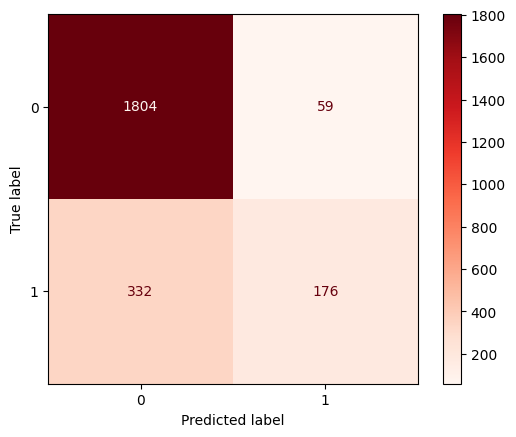

In [217]:
model_log_reg.fit(X_train_final,y_train)
y_pred_train = model_log_reg.predict(X_train_final)
y_pred_test = model_log_reg.predict(X_test_final)
print('train :')
print(classification_report(y_train, y_pred_train))
print(100*'=')
print('test :')
print(classification_report(y_test,y_pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_log_reg, X_train_final, y_train, cmap='Reds'))

### SVM

train :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1863
           1       0.66      0.48      0.56       508

    accuracy                           0.84      2371
   macro avg       0.77      0.71      0.73      2371
weighted avg       0.82      0.84      0.83      2371

test :
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       466
           1       0.54      0.38      0.44       127

    accuracy                           0.80       593
   macro avg       0.69      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593

Confusion Matrix      : 


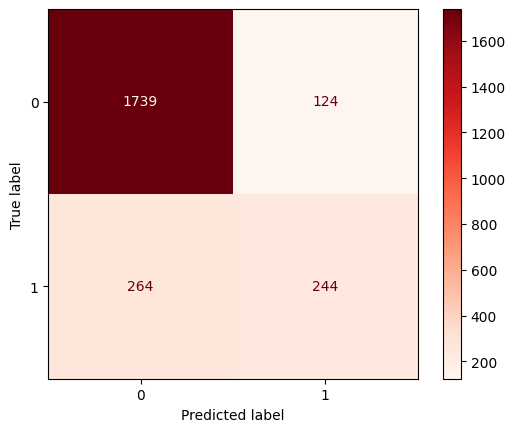

In [218]:
svm.fit(X_train_final, y_train)

svm_train = svm.predict(X_train_final)
svm_test = svm.predict(X_test_final)
print('train :')
print(classification_report(y_train, svm_train))
print(100*'=')
print('test :')
print(classification_report(y_test,svm_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm, X_train_final, y_train, cmap='Reds'))

### Decision Tree

train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1863
           1       1.00      1.00      1.00       508

    accuracy                           1.00      2371
   macro avg       1.00      1.00      1.00      2371
weighted avg       1.00      1.00      1.00      2371

test :
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       466
           1       0.39      0.44      0.41       127

    accuracy                           0.73       593
   macro avg       0.61      0.62      0.62       593
weighted avg       0.74      0.73      0.74       593

Confusion Matrix      : 


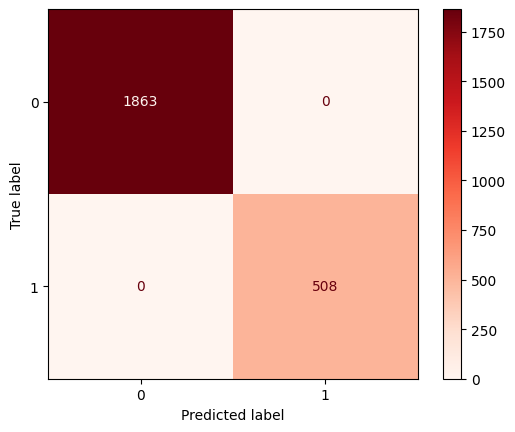

In [219]:

model_dt.fit(X_train_final, y_train)

model_dt_train = model_dt.predict(X_train_final)
model_dt_test = model_dt.predict(X_test_final)
print('train :')
print(classification_report(y_train, model_dt_train))
print(100*'=')
print('test :')
print(classification_report(y_test,model_dt_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dt, X_train_final, y_train, cmap='Reds'))

### Random Forest

train :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1863
           1       1.00      1.00      1.00       508

    accuracy                           1.00      2371
   macro avg       1.00      1.00      1.00      2371
weighted avg       1.00      1.00      1.00      2371

test :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       466
           1       0.57      0.37      0.45       127

    accuracy                           0.80       593
   macro avg       0.70      0.65      0.66       593
weighted avg       0.78      0.80      0.79       593

Confusion Matrix      : 


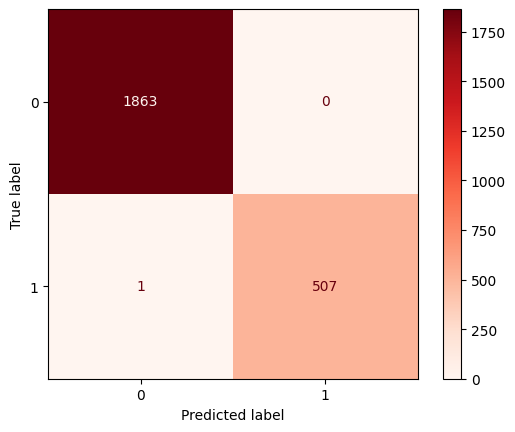

In [220]:
rand_for.fit(X_train_final, y_train)

rf_train = rand_for.predict(X_train_final)
rf_test = rand_for.predict(X_test_final)
print('train :')
print(classification_report(y_train, rf_train))
print(100*'=')
print('test :')
print(classification_report(y_test,rf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rand_for, X_train_final, y_train, cmap='Reds'))

### KNN

train :
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1863
           1       0.79      0.48      0.60       508

    accuracy                           0.86      2371
   macro avg       0.83      0.72      0.76      2371
weighted avg       0.85      0.86      0.85      2371

test :
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       466
           1       0.51      0.31      0.39       127

    accuracy                           0.79       593
   macro avg       0.67      0.62      0.63       593
weighted avg       0.76      0.79      0.77       593

Confusion Matrix      : 


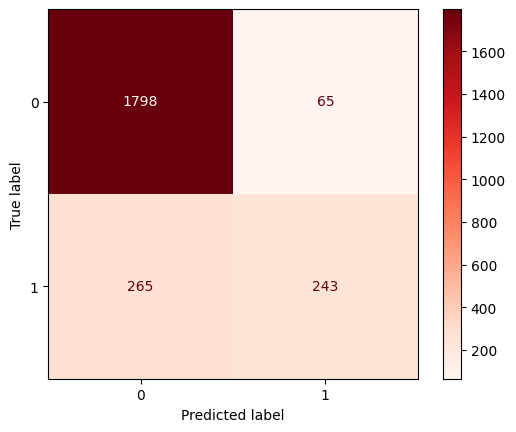

In [221]:
knn.fit(X_train_final, y_train)

knn_train = knn.predict(X_train_final)
knn_test = knn.predict(X_test_final)
print('train :')
print(classification_report(y_train, knn_train))
print(100*'=')
print('test :')
print(classification_report(y_test,knn_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_final, y_train, cmap='Reds'))

### Naive Bayes

train :
              precision    recall  f1-score   support

           0       0.93      0.15      0.25      1863
           1       0.23      0.96      0.38       508

    accuracy                           0.32      2371
   macro avg       0.58      0.55      0.32      2371
weighted avg       0.78      0.32      0.28      2371

test :
              precision    recall  f1-score   support

           0       0.90      0.15      0.26       466
           1       0.23      0.94      0.37       127

    accuracy                           0.32       593
   macro avg       0.57      0.55      0.32       593
weighted avg       0.76      0.32      0.29       593

Confusion Matrix      : 


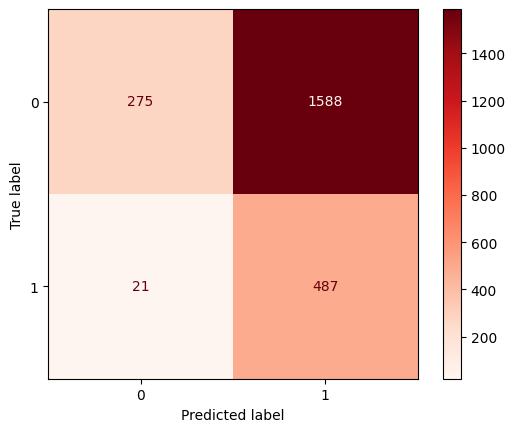

In [222]:
gnb.fit(X_train_final, y_train)

gnb_train = gnb.predict(X_train_final)
gnb_test = gnb.predict(X_test_final)
print('train :')
print(classification_report(y_train, gnb_train))
print(100*'=')
print('test :')
print(classification_report(y_test,gnb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gnb, X_train_final, y_train, cmap='Reds'))

### Neural Networks

train :
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1863
           1       0.85      0.56      0.68       508

    accuracy                           0.88      2371
   macro avg       0.87      0.77      0.80      2371
weighted avg       0.88      0.88      0.88      2371

test :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       466
           1       0.56      0.35      0.43       127

    accuracy                           0.80       593
   macro avg       0.70      0.64      0.66       593
weighted avg       0.78      0.80      0.78       593

Confusion Matrix      : 


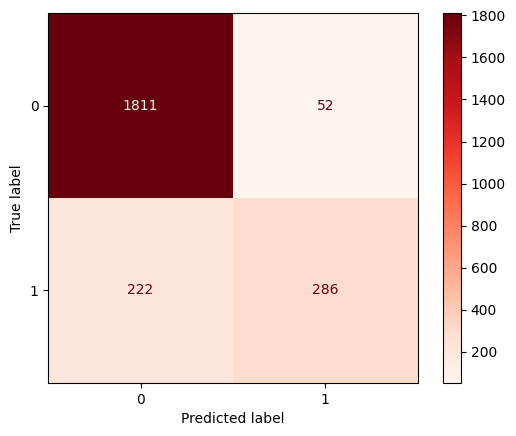

In [223]:
neural_n.fit(X_train_final, y_train)

neural_train = neural_n.predict(X_train_final)
neural_test = neural_n.predict(X_test_final)
print('train :')
print(classification_report(y_train, neural_train))
print(100*'=')
print('test :')
print(classification_report(y_test,neural_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(neural_n, X_train_final, y_train, cmap='Reds'))

### Cross Validation for Each Models

In [224]:
# Model LogReg
scores_lr = cross_val_score(model_log_reg, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_lr)
print(100*'=')
print("Mean recall:", scores_lr.mean())
print("Standard deviation:", scores_lr.std())


recall scores: [0.45098039 0.36       0.28       0.29411765 0.2745098  0.33333333
 0.25490196 0.47058824 0.29411765 0.29411765]
Mean recall: 0.33066666666666666
Standard deviation: 0.07098554850732516


In [225]:
# Model SVM
scores_svm = cross_val_score(svm, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_svm)
print(100*'=')
print("Mean recall:", scores_svm.mean())
print("Standard deviation:", scores_svm.std())


recall scores: [0.56862745 0.4        0.46       0.43137255 0.43137255 0.54901961
 0.47058824 0.64705882 0.39215686 0.43137255]
Mean recall: 0.4781568627450981
Standard deviation: 0.0788619650705859


In [226]:
# Model Decision Tree

scores_dt = cross_val_score(model_dt, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_dt)
print(100*'=')
print("Mean recall:", scores_dt.mean())
print("Standard deviation:", scores_dt.std())


recall scores: [0.45098039 0.38       0.4        0.39215686 0.37254902 0.35294118
 0.33333333 0.50980392 0.37254902 0.35294118]
Mean recall: 0.39172549019607844
Standard deviation: 0.049813014454793164


In [227]:
# Model Random Forest

scores_rf = cross_val_score(rand_for, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_rf)
print(100*'=')
print("recall accuracy:", scores_rf.mean())
print("Standard deviation:", scores_rf.std())

recall scores: [0.54901961 0.44       0.44       0.39215686 0.35294118 0.45098039
 0.37254902 0.52941176 0.39215686 0.43137255]
recall accuracy: 0.4350588235294118
Standard deviation: 0.06044616886971853


In [228]:
# Model KNN

scores_knn = cross_val_score(knn, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_knn)
print(100*'=')
print("Mean accuracy:", scores_knn.mean())
print("Standard deviation:", scores_knn.std())

recall scores: [0.47058824 0.4        0.3        0.33333333 0.33333333 0.43137255
 0.23529412 0.41176471 0.35294118 0.2745098 ]
Mean accuracy: 0.3543137254901961
Standard deviation: 0.07015142626269073


In [229]:
# Model Naive Bayes

scores_nb = cross_val_score(gnb, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_nb)
print(100*'=')
print("Mean recall:", scores_nb.mean())
print("Standard deviation:", scores_nb.std())

recall scores: [0.96078431 0.96       0.92       0.98039216 0.98039216 0.98039216
 0.94117647 0.88235294 0.98039216 0.96078431]
Mean recall: 0.9546666666666667
Standard deviation: 0.030599897223871436


In [230]:
# Model Neural Networks

scores_nn = cross_val_score(neural_n, X_train_final, y_train,scoring="recall", cv=10)

print("recall scores:", scores_nn)
print(100*'=')
print("Mean recall:", scores_nn.mean())
print("Standard deviation:", scores_nn.std())

recall scores: [0.50980392 0.36       0.44       0.35294118 0.41176471 0.43137255
 0.33333333 0.49019608 0.45098039 0.43137255]
Mean recall: 0.4211764705882353
Standard deviation: 0.05502060010565278


Berdasarkan hasil cross validation score diperoleh hasil terbaik pada mdel random forest berdasarkan nilai recall, mean recall dan std.

## Hyperparameter Tuning

In [231]:
from scipy.stats import uniform
# Naive Bayes
parameters = [
    {'var_smoothing': uniform(1e-9, 1e-6)
}]
search = RandomizedSearchCV(gnb, parameters, cv=5, scoring='recall', n_iter=10, random_state=42)
search.fit(X_train_final, y_train)



RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions=[{'var_smoothing': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8fd6930910>}],
                   random_state=42, scoring='recall')

In [232]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012161,0.005730,0.008527,0.002515,0.0,{'var_smoothing': 3.755401188473625e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4
1,0.009812,0.004971,0.006799,0.002819,0.000001,{'var_smoothing': 9.517143064099161e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4
2,0.004633,0.000863,0.003451,0.000621,0.000001,{'var_smoothing': 7.32993941811405e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4
3,0.003622,0.000327,0.002849,0.000143,0.000001,{'var_smoothing': 5.996584841970365e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4
4,0.003434,0.000614,0.002907,0.000434,0.0,{'var_smoothing': 1.5701864044243652e-07},0.931373,0.950495,0.980198,0.901961,0.950980,0.943001,0.025780,1
5,0.003393,0.000312,0.003089,0.000632,0.0,{'var_smoothing': 1.5699452033620264e-07},0.931373,0.950495,0.980198,0.901961,0.950980,0.943001,0.025780,1
6,0.003475,0.000187,0.003130,0.000435,0.0,{'var_smoothing': 5.908361216819946e-08},0.931373,0.950495,0.980198,0.901961,0.950980,0.943001,0.025780,1
7,0.003238,0.000309,0.002703,0.000094,0.000001,{'var_smoothing': 8.671761457749351e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4
8,0.003219,0.000384,0.002713,0.000231,0.000001,{'var_smoothing': 6.021150117432088e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4
9,0.003179,0.000115,0.002716,0.000063,0.000001,{'var_smoothing': 7.090725777960454e-07},0.931373,0.950495,0.980198,0.901961,0.941176,0.941041,0.025469,4


In [233]:
# score hyperparameter tuning
print(search.best_params_)
print(f'best score :',search.best_score_)

{'var_smoothing': 1.5701864044243652e-07}
best score : 0.9430013589594253


In [234]:
model_best = search.best_estimator_

model_best.fit(X_train_final, y_train)

model_best_train = model_best.predict(X_train_final)
model_best_test = model_best.predict(X_test_final)

print(classification_report(y_train, model_best_train))
print(classification_report(y_test,model_best_test))

              precision    recall  f1-score   support

           0       0.93      0.17      0.29      1863
           1       0.24      0.95      0.38       508

    accuracy                           0.34      2371
   macro avg       0.58      0.56      0.34      2371
weighted avg       0.78      0.34      0.31      2371

              precision    recall  f1-score   support

           0       0.90      0.18      0.30       466
           1       0.24      0.93      0.38       127

    accuracy                           0.34       593
   macro avg       0.57      0.55      0.34       593
weighted avg       0.76      0.34      0.31       593



## Model Saving

Dalam tahap ini dilakukan penyimpanan model dan file lain terkait dengan hasil pembuatan model

In [235]:
# Save the Files

import pickle, joblib
import json

with open('model_best.pkl', 'wb') as file_1:
  pickle.dump(model_best, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt','w') as file_5: 
  json.dump(cat_columns, file_5)



In [236]:
# data_cleaned
data_cleaned.to_csv('data_cleaned.csv') 

In [237]:
# data_cleaned.tail(5).to_csv('data_inf.csv')

## Conclusion

Secara keseluruhan setelah dilakukan proses cross validation dan dilihat recall, mean recall dan std deviasi diperoleh model dengan performa paling bagus pada Naive Bayes. Selanjutnya, model tersebut di tuning menggunakan hyperparameter RandomizedSearch. dan diperoleh hasil recall 93% pada data test yang menjadi target utama. Penggunaan recall dalam kasus ini bertujuan agar data analyst dapat meminimalisir false positif yang dihasilkan. Jika dinarasikan sebagai berikut :

Nilai recall akan menggambarkan persentase jumlah orang yang seharusnya gagal melakukan pembayaran namun diprediksi melakukan pembayaran. Tentunya hal ini sangat berbahaya dalam pencatatan laporan keuangan. 

## Conceptual Problems

Jawab pertanyaan berikut:

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?



Jawaban :  


1. Criterion merupakan parameter pengukuran yang digunakan untuk memilih variabel yang akan digunakan sebagai pemisah dalam setiap percabangan pada pohon keputusan. Dalam kasus ini, criterion yang digunakan adalah criterion Gini Impurity dan Entropy. Keduanya digunakan untuk mengukur homogenitas atau keberagaman di setiap percabangan pada pohon keputusan.

2. Pruning merupakan teknik yang digunakan untuk menghindari overfitting pada model. Overfitting terjadi ketika model terlalu kompleks dan terlalu terfokus pada data training sehingga tidak dapat digeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Pruning dilakukan dengan menghilangkan beberapa cabang atau node pada pohon keputusan yang tidak terlalu signifikan dan tidak berpengaruh banyak terhadap kinerja model. Dalam kasus ini saya menggunakan post prunning.

3. Untuk memilih K yang optimal pada KNN, dapat dilakukan dengan menggunakan metode cross-validation. Metode ini melibatkan pembagian data menjadi beberapa bagian atau fold, kemudian melakukan pengujian model dengan memilih satu fold sebagai data validasi dan sisanya sebagai data training. Pengujian model dilakukan dengan berbagai nilai K, dan K yang memberikan kinerja terbaik pada data validasi dipilih sebagai nilai K yang optimal.

4. Cross Validation adalah teknik evaluasi model yang digunakan untuk menghindari overfitting pada model dan memperkirakan kinerja model pada data yang belum pernah dilihat sebelumnya. Metode ini melibatkan pembagian data menjadi beberapa bagian atau fold, kemudian dilakukan pengujian model dengan memilih satu fold sebagai data validasi dan sisanya sebagai data training. Proses ini dilakukan beberapa kali dengan mengubah fold yang dipilih sebagai data validasi, sehingga semua data termasuk sebagai data validasi dan data training.

5. Metrics-metrics yang umum digunakan dalam evaluasi model antara lain:
- Accuracy: persentase klasifikasi benar dari seluruh data.
- Precision: persentase klasifikasi benar dari data yang diprediksi positif.
- Recall: persentase klasifikasi benar dari data negatif yang sebenarnya positif.
- F1 Score: harmonic mean dari Precision dan Recall.
Waktu yang tepat untuk menggunakan setiap metrics tergantung pada tujuan pemodelan dan jenis data yang digunakan. Misalnya, jika tujuan pemodelan adalah untuk menghindari kesalahan prediksi positif palsu, maka Precision dapat menjadi metrics yang lebih penting daripada Recall. Namun, jika tujuan pemodelan adalah untuk menghindari kesalahan prediksi negatif palsu, maka Recall dapat menjadi metrics yang lebih penting daripada Precision.